<a href="https://colab.research.google.com/github/samantha-olinsky/MA322-Python/blob/main/SLR/SLR_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review of EDA
Used cars dataset and cosmetic sales dataset.

In [ ]:
# we always need to import the necessary packages we'll need
import pandas as pd
import matplotlib.pyplot as plt

uc = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/usedcars.csv')
cos = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/cosmetic_sales.csv')


# double check by printing the dataframe
print(uc)

     year model  price  mileage   color transmission
0    2011   SEL  21992     7413  Yellow         AUTO
1    2011   SEL  20995    10926    Gray         AUTO
2    2011   SEL  19995     7351  Silver         AUTO
3    2011   SEL  17809    11613    Gray         AUTO
4    2012    SE  17500     8367   White         AUTO
..    ...   ...    ...      ...     ...          ...
145  2006   SES   6200    95000  Silver         AUTO
146  2002    SE   5995    87003     Red         AUTO
147  2000    SE   5980    96841     Red         AUTO
148  2001    SE   4899   151479  Yellow         AUTO
149  2000    SE   3800   109259     Red         AUTO

[150 rows x 6 columns]


In [ ]:
print(uc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB
None


In [ ]:
# in the USED CAR dataset "uc",
# how many observations/examples?
# what does each example represent?
# how many variables/features?

In [ ]:
print(cos)

     salesperson  year     month  ... units_sold order_amount  cost
0          Betsy  2004     April  ...          8          288   227
1       Hallagan  2004     March  ...        151          448   320
2         Ashley  2005  February  ...        416          402   347
3       Hallagan  2006       May  ...        202          650   561
4          Zaret  2004      June  ...        167          347   219
...          ...   ...       ...  ...        ...          ...   ...
1886      Ashley  2005  February  ...         95          435   281
1887     Colleen  2005  November  ...        114          514   404
1888       Zaret  2004   January  ...        202          659   546
1889    Hallagan  2006  November  ...        482          410   354
1890    Cristina  2006      June  ...        225          463   382

[1891 rows x 8 columns]


In [ ]:
print(cos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   salesperson   1891 non-null   object
 1   year          1891 non-null   int64 
 2   month         1891 non-null   object
 3   dept          1891 non-null   object
 4   location      1891 non-null   object
 5   units_sold    1891 non-null   int64 
 6   order_amount  1891 non-null   int64 
 7   cost          1891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 118.3+ KB
None


In [ ]:
# in the COSMETIC SALES data set "cos",
# how many observations/examples?
# what does each example represent?
# how many variables/features?

In [ ]:
# two way cross tabulated table (aka table with two rows)
# fancy way of saying a frequency table :)

freq_trans_color = pd.crosstab(index=uc["transmission"], columns=uc["color"])
print(freq_trans_color)

color         Black  Blue  Gold  Gray  Green  Red  Silver  White  Yellow
transmission                                                            
AUTO             26    17     1    14      4   24      28     12       2
MANUAL            9     0     0     2      1    1       4      4       1


In [ ]:
print(uc.groupby(['color', 'transmission'])['mileage'].median())

color   transmission
Black   AUTO            35753.5
        MANUAL          32743.0
Blue    AUTO            34846.0
Gold    AUTO            40180.0
Gray    AUTO            38056.0
        MANUAL          28108.5
Green   AUTO            30721.5
        MANUAL          40330.0
Red     AUTO            49844.0
        MANUAL          85229.0
Silver  AUTO            34970.0
        MANUAL          42452.0
White   AUTO            45238.0
        MANUAL          50492.0
Yellow  AUTO            79446.0
        MANUAL          81596.0
Name: mileage, dtype: float64


# SLR - Single Linear Regression

In [ ]:
# we need new packages for SLR
from sklearn import linear_model, metrics
from scipy import stats

# then bring in our rent dataset
rent_df = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/rent.csv')

In [ ]:
# what are we looking at? what is the data set referring to?
# lets take a look

print(rent_df.head(5))

   Unnamed: 0  rent  size
0           1  1730  1390
1           2  1840  1430
2           3  1570  1380
3           4  1720  1440
4           5  1240   980


In [ ]:
print(rent_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   rent        1000 non-null   int64
 2   size        1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None


In [ ]:
# ok, so based on that,
# we are looking at the relationship between rent and size

# With this data, we want to PREDICT:
# what the rent will be, based on the size of the apartment

# what is the target feature?
# (target feature is what you are looking to predict,
#              aka your Y value,  or the outcome variable)

To visually understand the relationship, we might want to see the data in a scatterplot. We can use the `plt.scatter` function. 

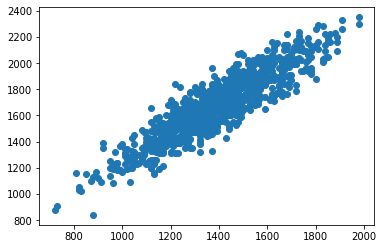

In [ ]:
print(plt.scatter(rent_df['size'], rent_df['rent']))

In [ ]:
# to calculate the correlation coeficient (aka pearson correlation coef)
# use the 'pearsonr' method of stats, specifying X and Y variables
# it will return the correlation coefficient and the p-value
print(stats.pearsonr(rent_df['size'], rent_df['rent']))

(0.9038801099286037, 0.0)


In [ ]:
# we can visually see a positive correlation on the plot
# and the correlation coefficient was pretty close to 1

# so we can feel confident about using these TWO features
# to run a linear regression model

In [ ]:
# for a linear regression model,
# we are going to be using the LinearRegression method of linear_model
# (which we imported from sklearn above)

# for our model, we need to fit the model with our data
# notice the double set of brackets[] around the Y variable

model = linear_model.LinearRegression().fit(rent_df[['size']], rent_df['rent'])

# of our model, we want to know the value of:
# coefficient "coef_"
# intercept "intercept_"

print(model.coef_)
print(model.intercept_)

[1.06336921]
201.38478810368906


In [ ]:
# therefore,
# Y_hat = 201.38 + 1.06*X

# in context:
# rent_hat = 201.38 + 1.06*size

In [ ]:
# So now that we have linear regression model,
# or a PREDICTION LINE
# we can use that to PREDICT the rent for a new apartment size

print(model.predict([[3000]]))  # take note of the double brackets

[3391.49242088]


In [ ]:
# R^2 is the coefficient of determination

# to calculate the R^2
# we will use the "metrics.r2_score" function

# that function requires two parameters, 
# the actual y values,
# and the all the y predictions

# storing all the predictions for the all the sizes as a variable
rent_predictions = model.predict(rent_df[['size']])

# putting the parameters into the function
print(metrics.r2_score(rent_df['rent'], rent_predictions))

0.8169992531245445


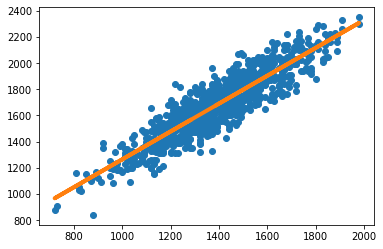

In [ ]:
# graphing the linear regression line

# in google colab, to put two graphs on the same plot,
# just include them in the same code block

# re-plot the original data (as points)
plt.plot(rent_df['size'],rent_df['rent'], 'o')

# plot the data of size as X, and the predictions as Y (as a line)
plt.plot(rent_df['size'], rent_predictions, '-', linewidth=4)

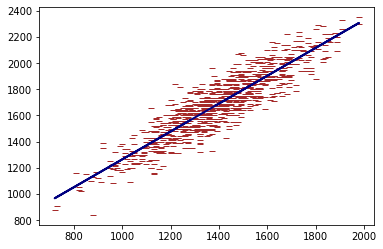

In [ ]:
# to change color/shape

# see all options here:
# https://matplotlib.org/3.3.2/api/markers_api.html#module-matplotlib.markers
plt.plot(rent_df['size'],rent_df['rent'], 'o', marker='_', color='brown')

# plot the data of size as X, and the predictions as Y (as a line)
plt.plot(rent_df['size'], rent_predictions, '-', linewidth=2, color='navy')

# Ice Cream Sales!!!
Here `temp` will represent the temperature on some day and the `gallons`
will represent how many gallons of ice cream we sell on that day. We
have 10 days of data.

We might wish to predict `gallons` from `temp` so `gallons` is our Y and
`temp` is our X.

Y is the predicted response or outcome and X is the predictor.


In [ ]:
temp = [73,65,81,90,75,77,82,93,86,79]
gallons = [110,95,135,160,97,105,120,175,140,121]

Let’s create a data frame using the two vectors above, so the `temp` is
the 1st column and the `gallons` is the 2nd column

In [ ]:
# first we zip the two lists togther
merged = list(zip(temp, gallons))

# then we create the dataframe
ic = pd.DataFrame(merged, columns = ['temp', 'gallons'])

# and finally, to double check, print it
print(ic)

   temp  gallons
0    73      110
1    65       95
2    81      135
3    90      160
4    75       97
5    77      105
6    82      120
7    93      175
8    86      140
9    79      121


The most simple plot that you might want to see from this situation is a
scatterplot. We can use the `plt.scatter` function. Remeber to define the x and y variables.

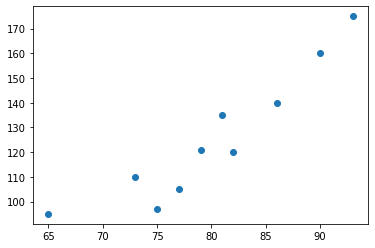

In [ ]:
print(plt.scatter(ic['temp'], ic['gallons']))

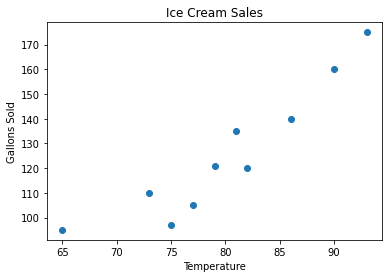

None


In [ ]:
# let's clean it up with a title and proper axis labels
plt.scatter(ic['temp'], ic['gallons'])
plt.xlabel("Temperature")
plt.ylabel("Gallons Sold")
plt.title("Ice Cream Sales")

In [ ]:
# here, we can set X and Y as variables before using them in the model

X = ic[['temp']]
Y = ic['gallons']

ic_model = linear_model.LinearRegression().fit(X,Y)

In [ ]:
# now that we have created our model,
# let's make some predictions!!

print("On a day with a temperature of 85°, the predicted gallons of icecream sold is:", ic_model.predict([[85]]))
print("Whereas, on a day with a temperature of 100°, the predicted gallons of icecream sold is:", ic_model.predict([[100]]))

On a day with a temperature of 85°, the predicted gallons of icecream sold is: [140.43270318]
Whereas, on a day with a temperature of 100°, the predicted gallons of icecream sold is: [185.22669252]


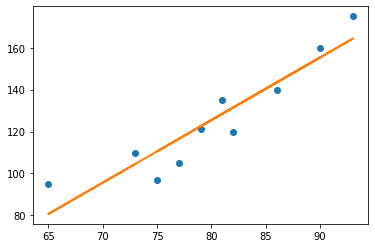

In [ ]:
# lastly, lets graph the linear regression line

# storing all the predictions for the all the sizes as a variable "temp_predictions"
gal_predictions = ic_model.predict(ic[['temp']])

# re-plot the original data (as points)
plt.plot(ic['temp'],ic['gallons'], 'o')
# plot the data of size as X, and the predictions as Y (as a line)
plt.plot(ic['temp'], gal_predictions, '-', linewidth=2)